In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import numpy as np
import wave
plt.rcParams['figure.figsize']=[20,4]
plt.rcParams.update({'font.size':20})

In [2]:
base='./audio/'
sound='alap1.wav'

In [3]:
a=base+sound

In [4]:
ipd.Audio(a)

In [5]:
voice, sr = librosa.load(a)

In [6]:
def limitFreq(freq,index):
    for i,j in enumerate(freq):
        if j>index:
            return i 

        
        
def remove_till_limit(Xaxis,limit,maxBins):
    newX=[]
    for i in Xaxis[:maxBins]:
        if i<limit:
            newX.append(0)
        else:
            newX.append(i)
    return newX



def getFundamental(Xaxis,bins):
    for i,j in enumerate(Xaxis[1:bins]):
        if j>0:
            return i

Text(0.5, 1.0, 'Power Spectrum')

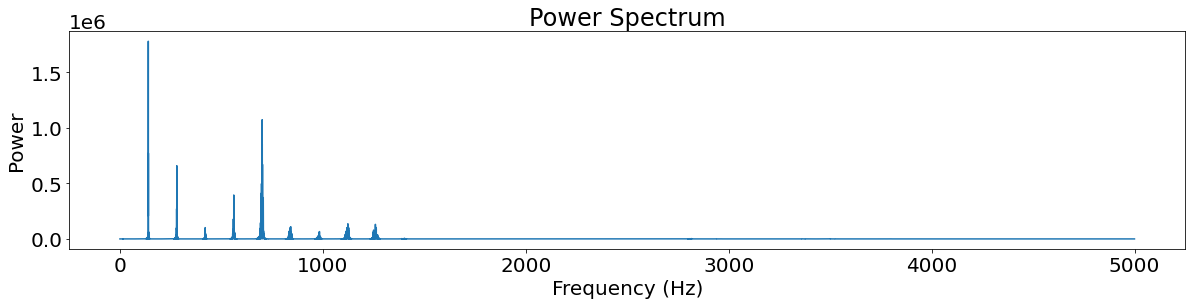

In [7]:
X = np.fft.fft(voice)
X_mag = np.absolute(X)
power_spectrum = np.square(X_mag)
f = np.linspace(0, sr, len(power_spectrum))
f_bins=limitFreq(f,5000)
plt.plot(f[1:f_bins], power_spectrum[1:f_bins])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power Spectrum')

In [8]:
newX_mag=remove_till_limit(power_spectrum,1000,f_bins)

In [9]:
print(f"Fundamental Frequency is {funda} Hz") 

NameError: name 'funda' is not defined

In [ ]:
fd=funda+100

In [ ]:
gr

In [ ]:
f

In [ ]:
def getIndxTill(end,freq,indx,gap):
    for i in range(indx,len(freq)):
        max=end*gap
        if freq[i]>max:
            indx=i
            return indx
        
def getMaxPow(start,end,Yaxis):
    return max(Yaxis[start:end])

In [ ]:
totalSplit=int(round(5000/funda))
result=[]
l=[0]
for i in range(totalSplit):
    index=getIndxTill(fd,f,l[i],i+1) 
    l.append(index)
    result.append(getMaxPow(l[i],l[i+1],newX_mag))
    
    

In [ ]:
import crepe
from scipy.io import wavfile

In [ ]:
sr, audio = wavfile.read('./audio/alap1.wav')
time, frequency, confidence, activation = crepe.predict(audio, sr, viterbi=True,step_size=100)

In [ ]:
def pitchEstimator(confidence):
    lis=[]
    for i,j in enumerate(confidence): 
        if j > 0.92:
            lis.append(i)
    val=[frequency[i] for i in lis]
    return sum(val)/len(val)
    

In [ ]:
pitch=round(pitchEstimator(confidence))

In [ ]:
print("Fundamental Frequency (Pitch) is ",pitch)

In [ ]:
def getIndxTill(end,freq,indx,gap):
    for i in range(indx,len(freq)):
        max=end*gap
        if freq[i]>max:
            indx=i
            return indx
        
def getMaxPow(start,end,Yaxis):
    if sum(Yaxis[start:end])!=0:
        return max(Yaxis[start:end])
    else:
        return 0

In [ ]:
totalSplit=int(round(5000/pitch))
result=[]
l=[1]
for i in range(totalSplit):
    index=getIndxTill(pitch,f,l[i],i+1) 
    l.append(index)
    result.append(getMaxPow(l[i],l[i+1],newX_mag))

In [ ]:
def getIndexofFunda(f,funda):
    for i,j in enumerate(f):
        if j==funda:
            return i+1
        
    

In [ ]:
print("Power Magnitude is ",newX_mag[getIndexofFunda(f,funda)])